In [1]:
import os,shutil
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [4]:
original_dir='/home/rijul/Downloads/dogs-vs-cats'
base_dir='/home/rijul/Downloads/dogs-vs-cats/cats_dogs_small'

In [5]:
os.mkdir(base_dir)

In [6]:
train_dir=os.path.join(base_dir,'train')
val_dir=os.path.join(base_dir,'val')
test_dir=os.path.join(base_dir,'test')
os.mkdir(train_dir)
os.mkdir(val_dir)
os.mkdir(test_dir)

In [ ]:
train_cats_dir=os.path.join(train_dir,'cats')
train_dogs_dir=os.path.join(train_dir,'dogs')

val_cats_dir=os.path.join(val_dir,'cats')
val_dogs_dir=os.path.join(val_dir,'dogs')

test_cats_dir=os.path.join(test_dir,'cats')
test_dogs_dir=os.path.join(test_dir,'dogs')

dirs=[train_cats_dir,train_dogs_dir,val_cats_dir,val_dogs_dir,test_cats_dir,test_dogs_dir]
for i in dirs:
    os.mkdir(i)

# Copying train, val, test images to small directory

In [9]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dir,'train',fname)
    dst=os.path.join(train_cats_dir,fname)
    shutil.copyfile(src,dst)

In [10]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dir,'train',fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [12]:
fnames=['cat.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dir,'train',fname)
    dst=os.path.join(val_cats_dir,fname)
    shutil.copyfile(src,dst)

In [13]:
fnames=['cat.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dir,'train',fname)
    dst=os.path.join(test_cats_dir,fname)
    shutil.copyfile(src,dst)

In [14]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src=os.path.join(original_dir,'train',fname)
    dst=os.path.join(train_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [15]:
fnames=['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src=os.path.join(original_dir,'train',fname)
    dst=os.path.join(val_dogs_dir,fname)
    shutil.copyfile(src,dst)

In [16]:
fnames=['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src=os.path.join(original_dir,'train',fname)
    dst=os.path.join(test_dogs_dir,fname)
    shutil.copyfile(src,dst)

# Define model

In [21]:
from keras.models import * 
from keras.layers import *

In [27]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dense(units=512,activation='relu'))
model.add(Dense(units=64,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 15, 15, 128)      

In [29]:
from keras import optimizers
model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])

# Data Preprocessing

In [30]:
from keras.preprocessing.image import ImageDataGenerator as IDG
train_datagen=IDG(rescale=1./255)
test_datagen=IDG(rescale=1./255)

train_gen=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
val_gen=test_datagen.flow_from_directory(val_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [32]:
for data_batch,labels_batch in train_gen:
    print(data_batch.shape)
    print(labels_batch.shape)
    break

(20, 150, 150, 3)
(20,)


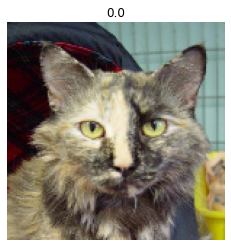

In [37]:
plt.imshow(data_batch[2])
plt.axis('off')
plt.title(labels_batch[2])
plt.show()

In [38]:
hist=model.fit_generator(train_gen,steps_per_epoch=100,epochs=20,validation_data=val_gen,validation_steps=50)
model.save('cats_dogs.h5')

/home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 25s 100ms/step - loss: 0.6942 - accuracy: 0.5135 - val_loss: 0.6904 - val_accuracy: 0.5330
Epoch 2/20
100/100 [==============================] - 10s 95ms/step - loss: 0.6819 - accuracy: 0.5675 - val_loss: 0.6620 - val_accuracy: 0.5890
Epoch 3/20
100/100 [==============================] - 10s 95ms/step - loss: 0.6347 - accuracy: 0.6478 - val_loss: 0.6357 - val_accuracy: 0.6060
Epoch 4/20
100/100 [==============================] - 9s 94ms/step - loss: 0.5856 - accuracy: 0.6901 - val_loss: 0.6016 - val_accuracy: 0.6770
Epoch 5/20
100/100 [==============================] - 10s 96ms/step - loss: 0.5503 - accuracy: 0.7141 - val_loss: 0.6217 - val_accuracy: 0.6480
Epoch 6/20
100/100 [==============================] - 10s 95ms/step - loss: 0.5319 - accuracy: 0.7345 - val_loss: 0.6222 - val_accuracy: 0.6580
Epoch 7/20
100/100 [==============================] - 10s 96ms/step - loss: 0.5078 - accuracy: 0.7532 - val_loss: 0.5819 - val_accuracy:

In [40]:
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']

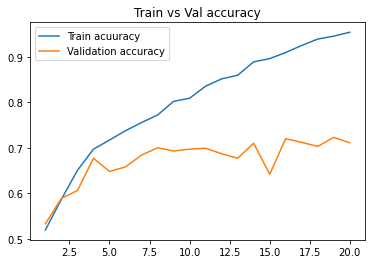

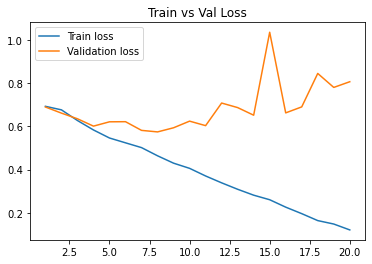

In [41]:
plt.plot(np.arange(1,21),train_acc,label='Train acuuracy')
plt.plot(np.arange(1,21),val_acc,label='Validation accuracy')
plt.legend()
plt.title('Train vs Val accuracy')
plt.show()

plt.plot(np.arange(1,21),train_loss,label='Train loss')
plt.plot(np.arange(1,21),val_loss,label='Validation loss')
plt.legend()
plt.title('Train vs Val Loss')
plt.show()

# Using Data augmentation

In [52]:
datagen=IDG(rotation_range=50,
            width_shift_range=0.2,
            height_shift_range=0.2,shear_range=0.2,zoom_range=0.5,
            horizontal_flip=True,fill_mode='nearest')    #Fill_mode = strategy for filling newly created pixels

In [53]:
from keras.preprocessing import image

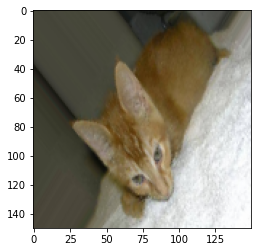

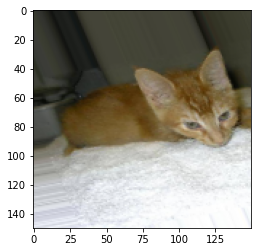

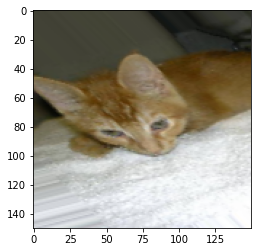

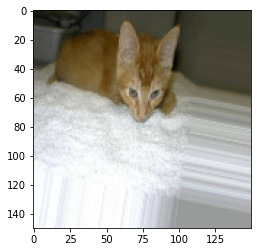

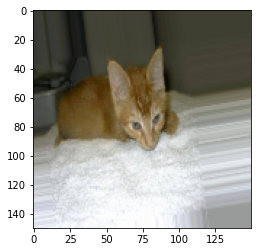

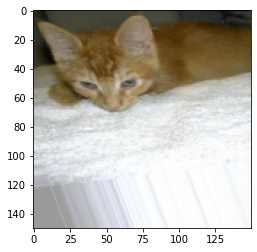

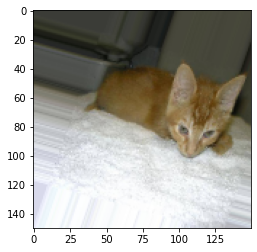

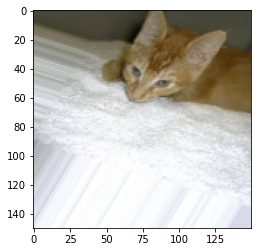

In [54]:
fnames=[os.path.join(train_cats_dir,fname) for fname in os.listdir(train_cats_dir)]
img_path=fnames[3]
img=image.load_img(img_path,target_size=(150,150))
x=image.img_to_array(img)
x=x.reshape((1,)+x.shape)   # reshape to (1,150,150,3)

i=0 
for batch in datagen.flow(x,batch_size=1):
    plt.figure(i)
    imgplot=plt.imshow(image.array_to_img(batch[0]))
    i+=1
    if i %8==0:
        break

# Defining covnet with dropout

In [71]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPool2D(2,2))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Flatten())
model.add(Dropout(0.5))

model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),loss='binary_crossentropy',metrics=['accuracy'])

model.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_50 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_50 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_51 (Conv2D)           (None, 72, 72, 32)        9248      
_________________________________________________________________
max_pooling2d_51 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_52 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_52 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
conv2d_53 (Conv2D)           (None, 15, 15, 128)     

# Training covnet using data augmentation

In [72]:
train_datagen=IDG(rescale=1./255,rotation_range=40,width_shift_range=0.2,height_shift_range=0.2
                  ,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen=IDG(rescale=1./255)

train_gen=train_datagen.flow_from_directory(train_dir,target_size=(150,150),batch_size=20,class_mode='binary')
val_gen=test_datagen.flow_from_directory(val_dir,target_size=(150,150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [73]:
import tensorflow as tf

In [74]:
with tf.device("/GPU:0"):
    hist=model.fit_generator(train_gen,steps_per_epoch=100,
                             epochs=100,validation_data=val_gen,validation_steps=50)

/home/rijul/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 22s 207ms/step - loss: 0.6938 - accuracy: 0.4920 - val_loss: 0.6980 - val_accuracy: 0.5000
Epoch 2/100
100/100 [==============================] - 21s 206ms/step - loss: 0.6925 - accuracy: 0.5104 - val_loss: 0.6885 - val_accuracy: 0.5010
Epoch 3/100
100/100 [==============================] - 21s 209ms/step - loss: 0.6820 - accuracy: 0.5589 - val_loss: 0.6733 - val_accuracy: 0.5780
Epoch 4/100
100/100 [==============================] - 21s 207ms/step - loss: 0.6750 - accuracy: 0.5890 - val_loss: 0.6706 - val_accuracy: 0.5760
Epoch 5/100
100/100 [==============================] - 21s 205ms/step - loss: 0.6652 - accuracy: 0.5851 - val_loss: 0.6585 - val_accuracy: 0.5970
Epoch 6/100
100/100 [==============================] - 21s 206ms/step - loss: 0.6578 - accuracy: 0.6184 - val_loss: 0.6496 - val_accuracy: 0.6260
Epoch 7/100
100/100 [==============================] - 20s 204ms/step - loss: 0.6618 - accuracy: 0.5987 - val_loss: 0.6442 -

Epoch 57/100
100/100 [==============================] - 20s 204ms/step - loss: 0.5103 - accuracy: 0.7461 - val_loss: 0.5656 - val_accuracy: 0.7250
Epoch 58/100
100/100 [==============================] - 21s 206ms/step - loss: 0.4979 - accuracy: 0.7631 - val_loss: 0.5057 - val_accuracy: 0.7640
Epoch 59/100
100/100 [==============================] - 21s 205ms/step - loss: 0.4634 - accuracy: 0.7736 - val_loss: 0.5297 - val_accuracy: 0.7280
Epoch 60/100
100/100 [==============================] - 20s 205ms/step - loss: 0.4830 - accuracy: 0.7653 - val_loss: 0.5205 - val_accuracy: 0.7450
Epoch 61/100
100/100 [==============================] - 21s 207ms/step - loss: 0.4935 - accuracy: 0.7534 - val_loss: 0.5196 - val_accuracy: 0.7420
Epoch 62/100
100/100 [==============================] - 21s 205ms/step - loss: 0.4724 - accuracy: 0.7760 - val_loss: 0.5071 - val_accuracy: 0.7490
Epoch 63/100
100/100 [==============================] - 21s 207ms/step - loss: 0.4873 - accuracy: 0.7600 - val_loss: 0

In [75]:
train_acc=hist.history['accuracy']
val_acc=hist.history['val_accuracy']

train_loss=hist.history['loss']
val_loss=hist.history['val_loss']


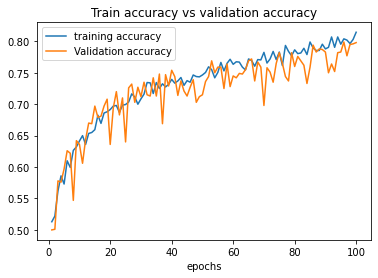

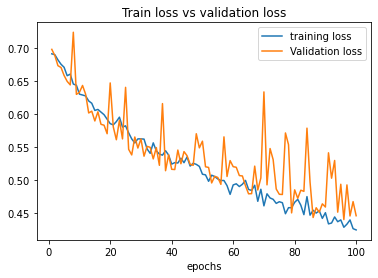

In [76]:
plt.plot(np.arange(1,101),train_acc,label='training accuracy')
plt.plot(np.arange(1,101),val_acc,label='Validation accuracy')
plt.title('Train accuracy vs validation accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

plt.plot(np.arange(1,101),train_loss,label='training loss')
plt.plot(np.arange(1,101),val_loss,label='Validation loss')
plt.title('Train loss vs validation loss')
plt.xlabel('epochs')
plt.legend()
plt.show()